**Visualizing Data in Python**

In [10]:
# Jupyter magic command to set up matplotlib to display plots directly in the notebook
%matplotlib inline

#import required packages pandas, matplotlib.pyplot and seaborn; use aliases to reference throughout the code
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Let's import and preview the data we will use to illustrate how to visualize data.**

In [34]:
# create a vehicles dataframe from the vehicles.csv file
vehicles = pd.read_csv("vehicles.csv")

# display the first 5 rows of your dataframe
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


**How to create a Relationship Visualization**

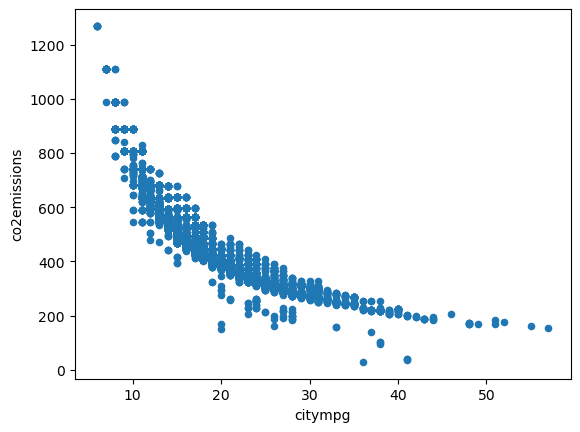

In [48]:
# scatter plot of city mpg and co2emissions
vehicles.plot(kind = 'scatter', x = 'citympg', y = 'co2emissions')
plt.show()

**How to create a Distribution Visualizaton**

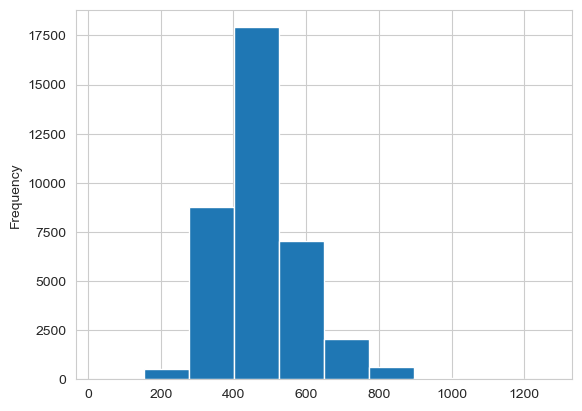

In [118]:
# histogram plot of co2emissions
vehicles['co2emissions'].plot(kind = 'hist')
plt.show()

**How to create a Comparison Visualization**

In [50]:
# Pivot table of dataframe with columns -> drive and values -> co2emissions
vehicles.pivot(columns = 'drive', values = 'co2emissions')

drive,2-Wheel Drive,4-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Rear-Wheel Drive
0,555.437500,NaN,NaN,NaN,NaN
1,555.437500,NaN,NaN,NaN,NaN
2,484.761905,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,424.166667
4,NaN,NaN,NaN,NaN,555.437500
...,...,...,...,...,...
36974,NaN,NaN,NaN,NaN,442.000000
36975,NaN,NaN,NaN,NaN,466.000000
36976,NaN,NaN,NaN,NaN,503.000000
36977,NaN,NaN,NaN,NaN,661.000000


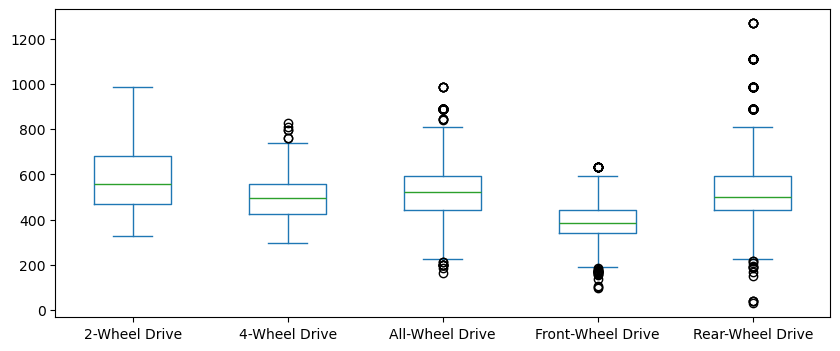

In [54]:
# Boxplot using pivot and matplotlib, same columns and values as above, specify a figsize
vehicles.pivot(columns = 'drive', values = 'co2emissions').plot(kind = 'box', figsize = (10,4))
plt.show()

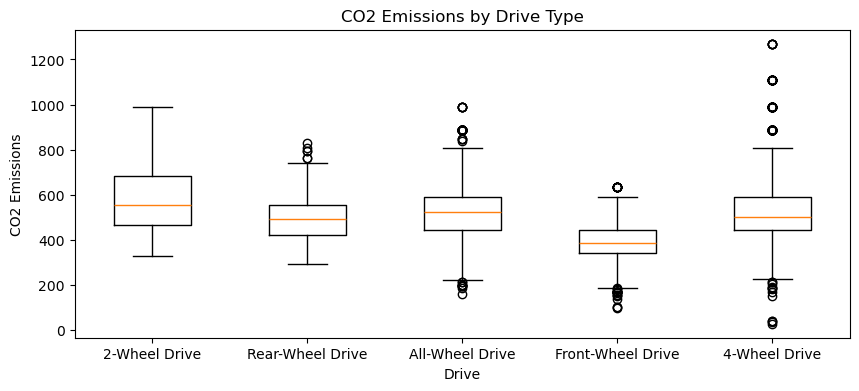

In [56]:
# Alternative matplotlib boxplot method

# Group the data by 'drive' and create a list of co2emissions for each group
grouped_data = [group['co2emissions'].values for name, group in vehicles.groupby('drive')]
labels = vehicles['drive'].unique()

# Create figure and axis
plt.figure(figsize=(10, 4))

# Create boxplot
plt.boxplot(grouped_data, tick_labels=labels)

# Add labels and title
plt.xlabel('Drive')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions by Drive Type')

plt.show()

This code will create a boxplot where:
- Each box represents a different drive type
- The y-axis shows the CO2 emissions values
- The x-axis is labeled with the different drive types from your data

The main difference from the seaborn version is that matplotlib's `boxplot()` requires the data to be pre-grouped, while seaborn can work directly with the DataFrame structure.

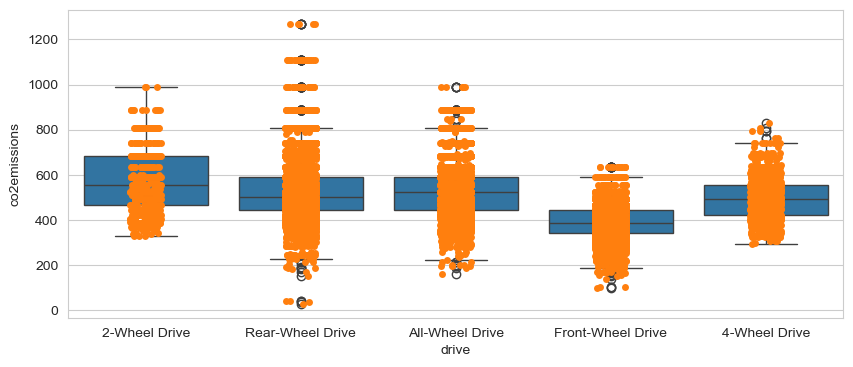

In [114]:
## Boxplot using Seaborn
# Set style
sns.set_style('whitegrid')

# Create figure with specified size
plt.figure(figsize=(10,4))

# Create boxplot
ax = sns.boxplot(x='drive', y='co2emissions', data=vehicles)

# Add strip plot on top of boxplot - stripplot adds the dots for more detailed information
ax = sns.stripplot(x='drive', y='co2emissions', data=vehicles)
plt.show()

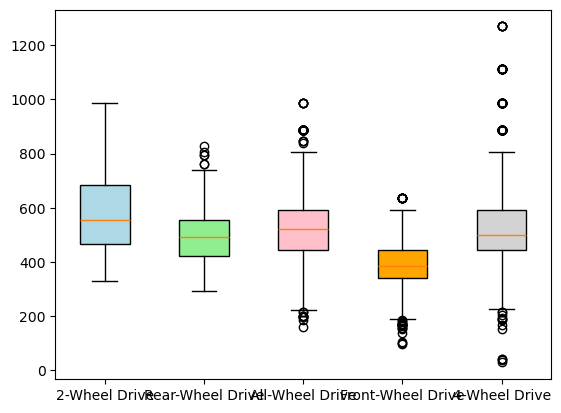

In [64]:
# Add Color to the different boxes

# Define colors for each box
colors = ['lightblue', 'lightgreen', 'pink', 'orange', 'lightgray']  # adjust colors and number based on your drive types

# Create boxplot with colors
bp = plt.boxplot(grouped_data, tick_labels=labels, patch_artist=True)  # patch_artist=True allows filling boxes with colors

# Set colors for each box
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

In [ ]:

Key changes made:
1. Added `colors` list to define different colors for each box
2. Added `patch_artist=True` to allow filling boxes with colors
3. Used a loop to set the color for each box using `set_facecolor()`

You can modify the colors in the `colors` list to match your preferences or the number of drive types in your data. Some color options include:
- 'lightblue', 'lightgreen', 'pink', 'orange', 'lightgray'
- 'skyblue', 'yellowgreen', 'salmon', 'gold', 'plum'
- Or any valid matplotlib color name or hex code

**How to create a Composition Visualization**

In [72]:
# group by year and count by drive
vehicles.groupby('year')['drive'].value_counts()

year  drive            
1984  2-Wheel Drive        477
      All-Wheel Drive      301
      Rear-Wheel Drive       4
1985  Rear-Wheel Drive     772
      Front-Wheel Drive    672
                          ... 
2017  4-Wheel Drive        173
2018  All-Wheel Drive      245
      Rear-Wheel Drive     230
      Front-Wheel Drive    193
      4-Wheel Drive        124
Name: count, Length: 123, dtype: int64

In [74]:
#group by year, count by drive and use the unstack function;creating a table of rows (years) and columns (drive types)
vehicles.groupby('year')['drive'].value_counts().unstack()

drive,2-Wheel Drive,4-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Rear-Wheel Drive
year,,,,,
1984,477.0,NaN,301.0,NaN,4.0
1985,NaN,NaN,255.0,672.0,772.0
1986,NaN,1.0,202.0,430.0,576.0
1987,NaN,NaN,220.0,470.0,557.0
1988,NaN,NaN,215.0,447.0,468.0
1989,NaN,NaN,227.0,445.0,480.0
1990,NaN,NaN,241.0,422.0,413.0
1991,NaN,NaN,243.0,431.0,456.0
1992,NaN,NaN,232.0,455.0,432.0


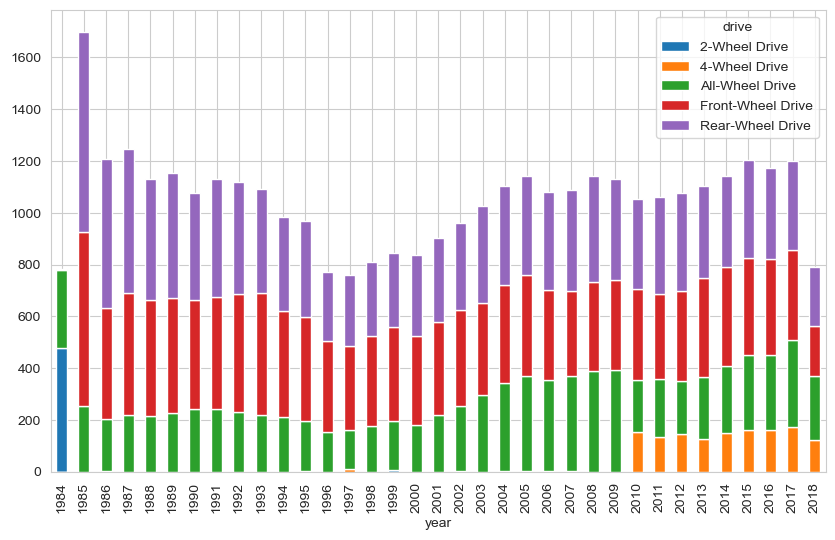

In [78]:
#plot the table in a bar chart, using stacked=True, specify figsize
vehicles.groupby('year')['drive'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.show()

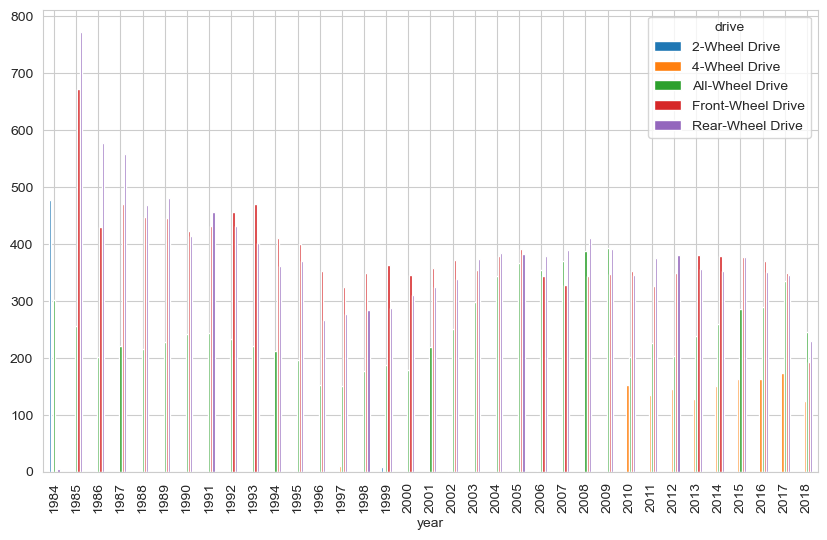

In [80]:
#plot the table in a bar chart, using stacked=False, specify figsize
vehicles.groupby('year')['drive'].value_counts().unstack().plot(kind = 'bar', stacked = False, figsize = (10,6))
plt.show()

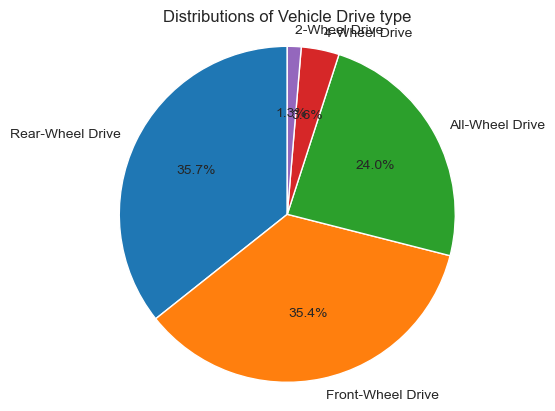

In [86]:
# pie chart 'Distribution of Vehicle Drive Type'

# First, get the count of each drive
make_counts = vehicles['drive'].value_counts()
# Create pie chart
plt.pie(make_counts.values, labels=make_counts.index, autopct='%1.1f%%', startangle=90)
# Add title
plt.title('Distributions of Vehicle Drive type')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

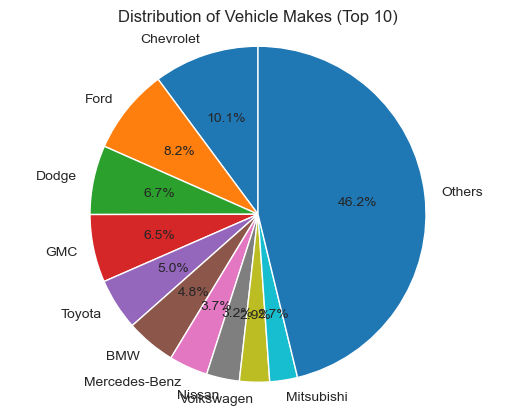

In [112]:
# pie chart 'Distribution of Vehicle Makes (Top 10)'
# First, get the count of each make
make_counts = vehicles['make'].value_counts()

# Get top 10 makes
top_10_makes = make_counts.head(10)
others = pd.Series({'Others': make_counts[10:].sum()})
make_counts_final = pd.concat([top_10_makes, others])

# Create the pie chart 
plt.pie(make_counts_final.values, labels=make_counts_final.index, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Vehicle Makes (Top 10)')
# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')
plt.show()

**Seaborn Histogram Frequency of Make**

KDE line to help visualize the distribution of data

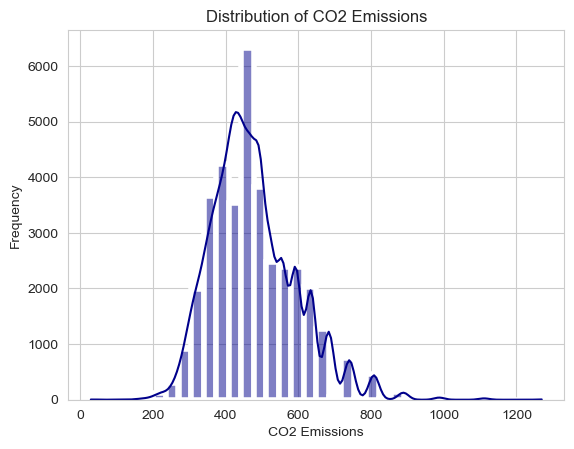

In [103]:
# Create histogram of CO2 emissions
sns.histplot(data=vehicles['co2emissions'],    # Specify the column for CO2 emissions
             kde=True,                         # Add KDE line
             bins=int(180/5),                  # Number of bins
             color='darkblue',                 # Color of histogram
             linewidth=4)                      # Width of KDE line

# Add labels and title
plt.xlabel('CO2 Emissions')                    # X-axis label
plt.ylabel('Frequency')                        # Y-axis label
plt.title('Distribution of CO2 Emissions')     # Plot title
plt.show()

**Seaborn Histogram Distribution of Drive types by year**

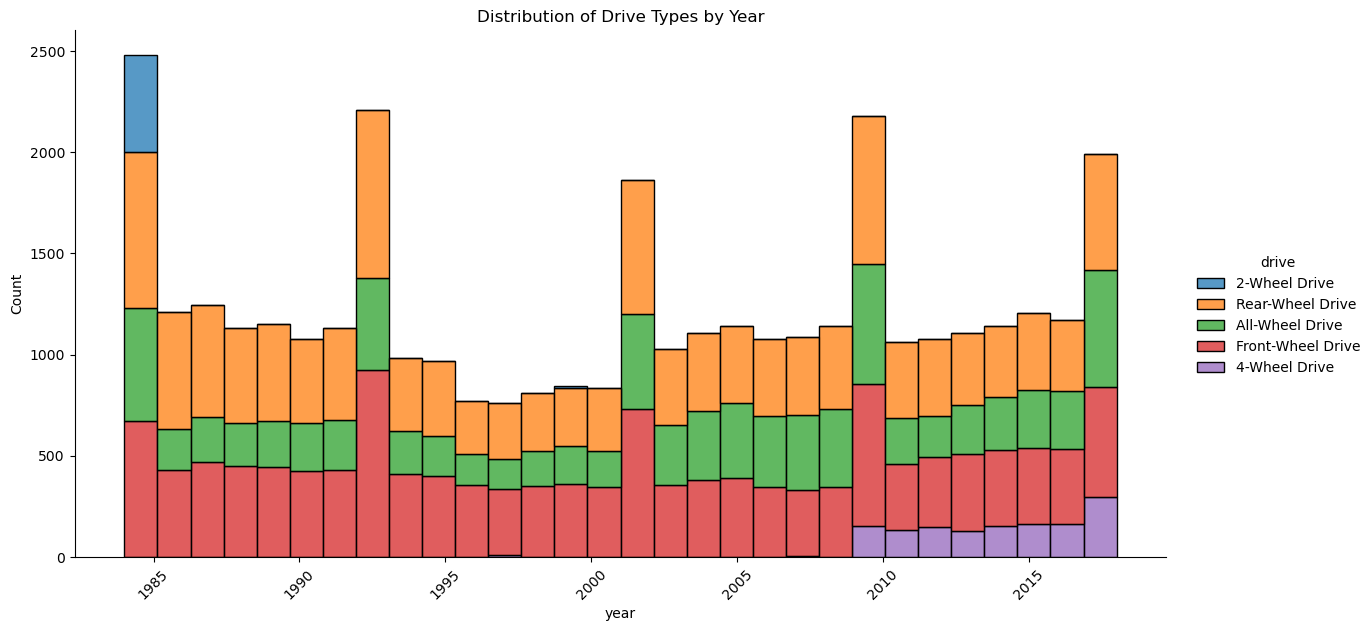

In [38]:
# Using displot for more customization options
sns.displot(data=vehicles,
            x='year',
            hue='drive',
            multiple="stack",
            stat='count',
            height=6,
            aspect=2)                     # Control figure size ratio

plt.title('Distribution of Drive Types by Year')
plt.xticks(rotation=45)
plt.show()

C:\Users\snide\AppData\Local\Temp\ipykernel_20212\3501799690.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Drive Type')


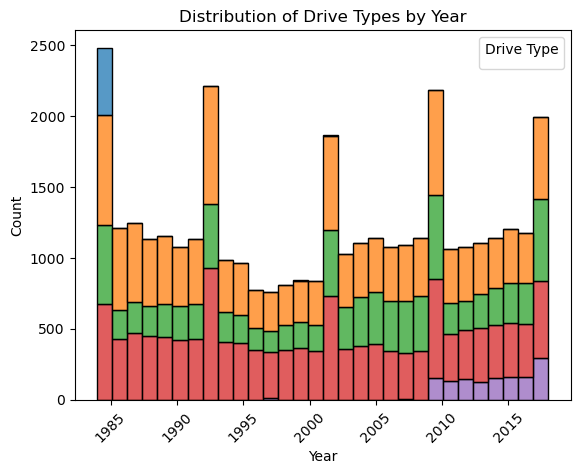

In [40]:
# Create histogram of drive types by year
sns.histplot(data=vehicles, 
             x='year',                    # X-axis: year
             hue='drive',                 # Group/color by drive type
             multiple="stack",            # Stack the bars
             stat='count')                # Use count statistics

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Drive Types by Year')
plt.xticks(rotation=45)                  # Rotate x-axis labels for better readability

# Add legend
plt.legend(title='Drive Type')
plt.show()